references : http://nbviewer.jupyter.org/gist/FinanceData/d32ee2d58d760588669494407391b241

In [55]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [49]:
def korean_stock_data_is_mine(how_much_page ,stock_code):
    '''
    how_much_page : 원하는 페이지만큼의 데이터를 가지고 옵니다. 50개의 페이지가 넘어갈 때마다 알림이 나옵니다.
    페이지 하나 당, 주말 포함 10일의 데이터가 있습니다.
    
    stock_code : 아래의 주석에 나와있는 코드
를 string으로 넣어주시면 됩니다.
    
    ***stock_code는 아래의 링크를 참조하시기 바랍니다.
    http://bigdata-trader.com/itemcodehelp.jsp
    ***
    
    output // 주말의 결측치가 제거된 데이터 프레임이 나옵니다. 컬럼 정보로는
    날짜 , 종가 , 전일비 , 시가 , 고가 , 저가 , 거래량 이 됩니다.
    '''
    final_df = pd.DataFrame(columns=[0, 1, 2, 3, 4, 5, 6])

    for page in range(1,how_much_page+1) :
        try : 
            if page % 50 == 0 : print('{} th is done.'.format(page))

            url = 'http://finance.naver.com/item/sise_day.nhn?code={}&page={}'.format(stock_code,page)
            df = pd.read_html(url)[0]
            df = df.iloc[1:,:]
            final_df = pd.concat([final_df,df],axis=0)
        except : break ; print('{}th data is list data'.format(page))
            
    final_df.rename(columns={0:'날짜',1:'종가',2:'전일비',3:'시가',4:'고가',5:'저가',6:'거래량'},inplace=True)
    final_df.dropna(axis=0,inplace=True)
    final_df.reset_index(drop=True,inplace=True)

    return final_df

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(16, 4))
import datetime
import pandas as pd
import FinanceDataReader as fdr

In [3]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)

# KB금융(105560)
df = fdr.DataReader("035720", start, end)
df = df[df.Volume > 0]
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,115300,117500,117500,115300,296130.0,-0.0043
2016-01-05,117100,114100,117500,113800,316640.0,0.0156
2016-01-06,119100,118000,121100,117300,542620.0,0.0171
2016-01-07,117300,118400,120500,116600,341020.0,-0.0151
2016-01-08,115200,115300,115900,113700,398700.0,-0.0179


# 라인 차트 - 가격

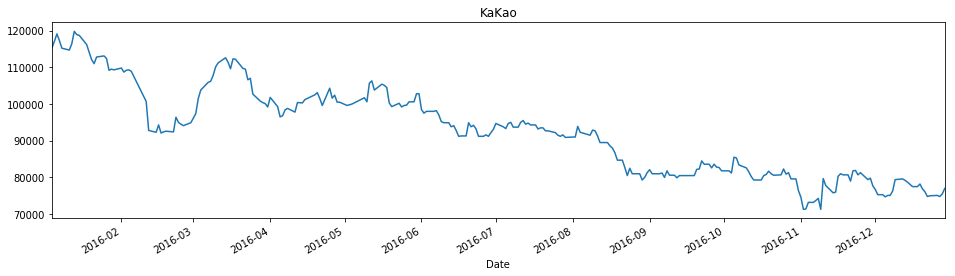

In [7]:
# 가격 Close
df['Close'].plot(figsize=(16, 4), title='KaKao')

# 라인 차트 - 거래량

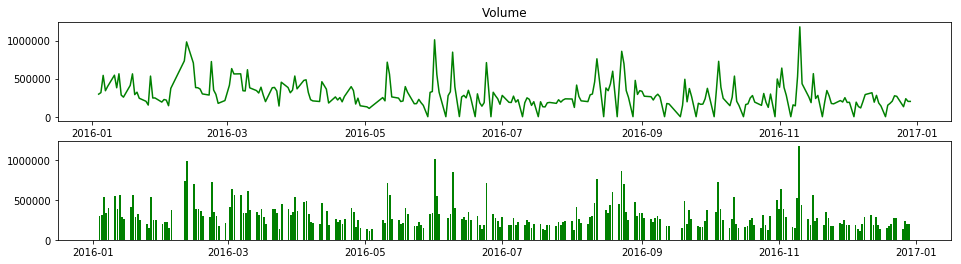

In [9]:
plt.subplot(211)
plt.title ('Volume')
plt.plot(df['Volume'], color='g')
plt.subplot(212)
plt.bar(df.index.to_pydatetime(), df['Volume'], color='g')
plt.show()

# 이동평균
- 활용
    - 이동평균 : 특정 구간의 평균치를 이은 선 (구간 : 시계열적 구간)
    - 주가의 불규칙성을 완화하는 데 사용
- 기간별 분류 
    - 장기일 수록 추세는 정확하나 후행성이 커짐
        - 단기추세 : 5일
        - 중기추세 : 20,60
        - 장기추세 : 120,200

In [11]:
df['MA_5'] = df['Close'].rolling(window=5).mean() # 단기추세
df['MA_20'] = df['Close'].rolling(window=20).mean() # 중기추세
df.dropna().head()

,Close,Open,High,Low,Volume,Change,MA_5,MA_20
Date,,,,,,,,
2016-01-29,109300,110000,110600,108700,246130.0,-0.0018,110700.0,114610.0
2016-02-01,109800,110100,110800,109100,192060.0,0.0046,110040.0,114335.0
2016-02-02,108700,110000,110400,108700,225620.0,-0.0100,109300.0,113915.0
2016-02-03,109200,107900,109700,107900,218260.0,0.0046,109300.0,113420.0
2016-02-04,109300,109200,109900,108700,144630.0,0.0009,109260.0,113020.0


# 플롯으로 추세 적용치를 확인해본다.

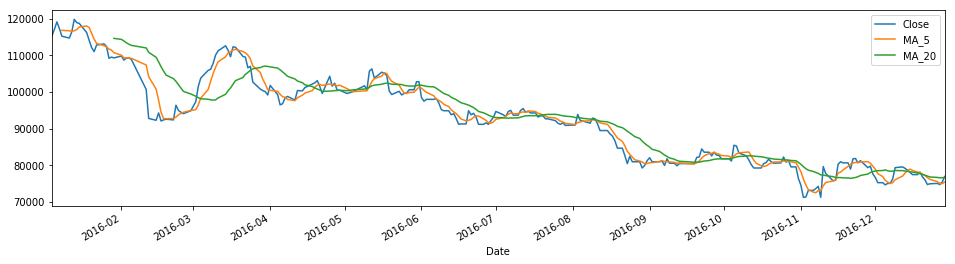

In [12]:
df[['Close', 'MA_5', 'MA_20']].plot()

## 마지막 구간을 확대
- window 구간이 커질 수록, 변동성이 작아지면서 추세성 반영률이 높아지지만, 후행성이 높아지는 것을 볼 수 있다.

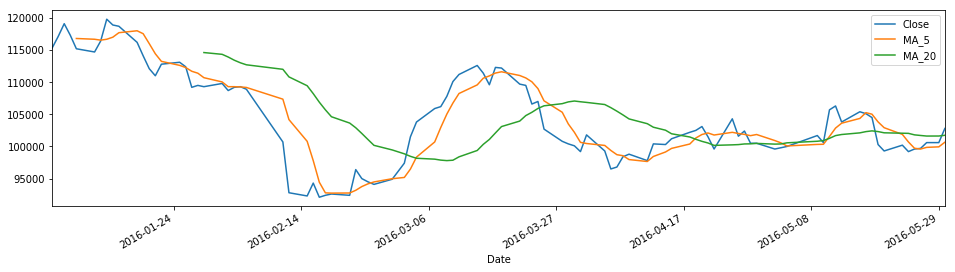

In [14]:
df[['Close', 'MA_5', 'MA_20']].head(100).plot()

# 이동평균선 분석법

### 정배열과 역배열
- 정배열 : 하단부터 장기, 중기, 단기 이동평균 선이 존재 (상승국면)
- 역배열 : 하단부터 단기, 중기, 장기 이동평균 선이 존재 (하락국면)

### 추세 전환
- "단기 → 장기"순으로 주가의 이동평균값이 움직임

### 골든크로스, 데드크로스
- 골든크로스(Golden cross)
    - 단기이동평균선이 중장기이동평균선을 상향돌파(크로스)하는 것.
    - 즉, 5일선이 20일선을, 20일선이 60일선을, 60일선이 120일선을 돌파할 때

- 데드크로스 (Dead cross)
    - 단기 이동평균선이 중장기이동평균선을 하향돌파 하는 것
    - 즉, 5일선이 20일선을, 20일선이 60일선을, 60일선이 120일선을 하향 돌파
- 계산법
    - 단기와 장기 이동평균의 차이값(MA_5 - MA_20)를 비교
    - 크로스(즉, 이전 값과 부호가 바뀌는 경우): (차이값 X 이전 차이값) < 0

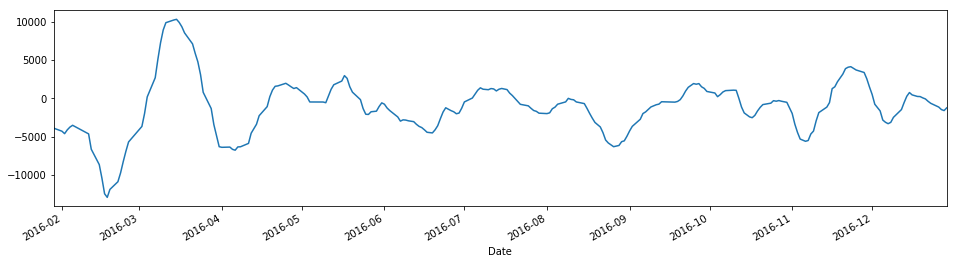

In [15]:
df['diff'] = df['MA_5'] - df['MA_20']
df['diff'].dropna().plot()

In [23]:
#  (이전 차이값 X 차이값 ) < 0: 이전 값과 부호가 바뀐 경우 
cross = df['diff'].shift(1) * df['diff'] < 0 # cross 는 True or False 의 형태로 반환된다.
df['diff'][cross == True]


Date
2016-03-04     175.0
2016-03-28   -1340.0
2016-04-19     205.0
2016-05-04    -485.0
2016-05-11     295.0
2016-05-23    -180.0
2016-07-04      30.0
2016-07-20     -20.0
2016-09-21     310.0
2016-10-12     -10.0
2016-11-16    1250.0
2016-12-02    -780.0
2016-12-14     255.0
2016-12-21     -90.0
Name: diff, dtype: float64

In [24]:
# 'cross' 컬럼을 추가하여, diff의 부호가 이전과 달라지는 경우 각각 저장
# 이때, 현재 diff > 0 이면, 골든 크로스, diff < 0 이면, 데드 크로스, 
df['cross'] = ''
df.loc[(df['diff'].shift(1) * df['diff'] < 0) & (df['diff'] > 0), 'cross'] = 'golden'
df.loc[(df['diff'].shift(1) * df['diff'] < 0) & (df['diff'] < 0), 'cross'] = 'dead'

# 부호가 달라지면 : (df['diff'].shift(1) * df['diff'] < 0) & (df['diff'] < 0)
# cross 컬럼에다가 : , 'cross'
# df 데이터프레임의 cross 컬럼에 golden or dead 라는 문구를 넣어라 : df.loc // golden | dead

In [25]:
df[df['cross'] != '']
#signal이 발생한 컬럼

,Close,Open,High,Low,Volume,Change,MA_5,MA_20,diff,cross
Date,,,,,,,,,,
2016-03-04,103800,102400,104600,101300,561550.0,0.0227,98340.0,98165.0,175.0,golden
2016-03-28,100800,101700,102800,100300,383170.0,-0.0185,105320.0,106660.0,-1340.0,dead
2016-04-19,102500,102100,102600,101600,219800.0,0.0029,101320.0,101115.0,205.0,golden
2016-05-04,100000,100100,100700,99700,133550.0,0.0020,100080.0,100565.0,-485.0,dead
2016-05-11,105700,101500,106300,100800,716120.0,0.0507,101560.0,101265.0,295.0,golden
2016-05-23,100200,100200,101700,100000,170220.0,0.0091,101880.0,102060.0,-180.0,dead
2016-07-04,93800,95200,95500,93700,188860.0,-0.0095,93000.0,92970.0,30.0,golden
2016-07-20,93500,93600,94600,93300,128610.0,0.0000,93760.0,93780.0,-20.0,dead
2016-09-21,82300,82000,82500,81200,195490.0,0.0012,81200.0,80890.0,310.0,golden


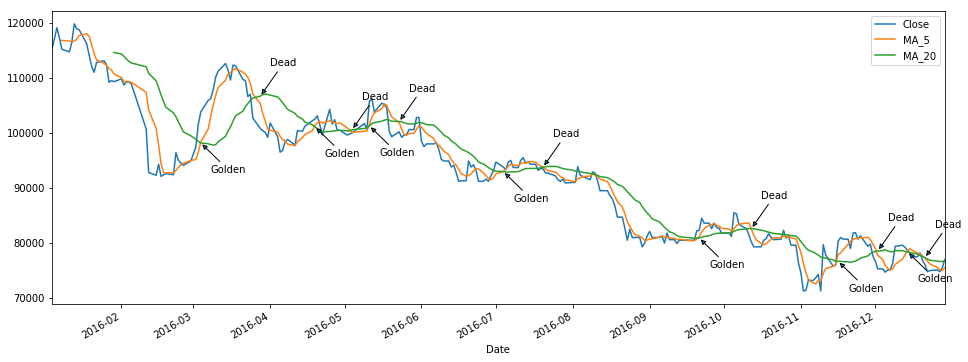

In [26]:
ax = df[['Close', 'MA_5', 'MA_20']].plot(figsize=(16,6))
prev_key = prev_val = 0

for key, val in df['diff'].iteritems():
    if val == 0:
        continue

    if val * prev_val < 0 and val > prev_val:
        ax.annotate('Golden', xy=(key, df['MA_20'][key]), xytext=(10,-30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    elif val * prev_val < 0 and val < prev_val:
        ax.annotate('Dead', xy=(key, df['MA_20'][key]), xytext=(10,30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
        
    prev_key, prev_val = key, val

In [39]:
import numpy as np

In [42]:
signal_ls = [i for i in df['cross']]
signal_ls = [np.nan if not i else i for i in signal_ls ]

In [43]:
df['Signal'] = signal_ls

In [50]:
df.fillna(method='ffill',inplace=True)

In [59]:
bt_df = df.dropna()
bt_df.tail()

,Close,Open,High,Low,Volume,Change,MA_5,MA_20,diff,cross,return,Signal,bt_return
Date,,,,,,,,,,,,,
2016-12-23,75000,75500,75900,74500,267520.0,0.0027,76200.0,76860.0,-660.0,,1.002674,dead,0.997326
2016-12-26,75100,75000,75800,75000,131230.0,0.0013,75580.0,76730.0,-1150.0,,1.001333,dead,0.998667
2016-12-27,74800,75500,75600,74600,236210.0,-0.0040,75160.0,76635.0,-1475.0,,0.996005,dead,1.003995
2016-12-28,75500,75000,75900,74700,200970.0,0.0094,75040.0,76645.0,-1605.0,,1.009358,dead,0.990642
2016-12-29,77000,75700,77000,75300,200930.0,0.0199,75480.0,76730.0,-1250.0,,1.019868,dead,0.980132


In [61]:
bt_df['bt_return'] = [bt_df['return'][idx] if bt_df['Signal'][idx] == 'golden' else 2-(bt_df['return'][idx]) for idx in range(len(bt_df))]
bt_df.head()

/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Close,Open,High,Low,Volume,Change,MA_5,MA_20,diff,cross,return,Signal,bt_return
Date,,,,,,,,,,,,,
2016-03-04,103800,102400,104600,101300,561550.0,0.0227,98340.0,98165.0,175.0,golden,1.022660,golden,1.022660
2016-03-07,105900,104100,107000,104100,563200.0,0.0202,100700.0,98025.0,2675.0,,1.020231,golden,1.020231
2016-03-08,106200,106600,107200,104500,341110.0,0.0028,102960.0,97875.0,5085.0,,1.002833,golden,1.002833
2016-03-09,107800,106000,108500,105100,338070.0,0.0151,105040.0,97800.0,7240.0,,1.015066,golden,1.015066
2016-03-10,110100,107500,111900,107400,616940.0,0.0213,106760.0,97860.0,8900.0,,1.021336,golden,1.021336


In [63]:
from functools import reduce

In [67]:
np.round(bt_df['bt_return'].cumprod()[-1],2)

1.1

In [83]:
df.tail()

,Close,Open,High,Low,Volume,Change,MA_5,MA_20,diff,cross,return,Signal,bt_return
Date,,,,,,,,,,,,,
2016-12-23,75000,75500,75900,74500,267520.0,0.0027,76200.0,76860.0,-660.0,,1.002674,dead,0.997326
2016-12-26,75100,75000,75800,75000,131230.0,0.0013,75580.0,76730.0,-1150.0,,1.001333,dead,0.998667
2016-12-27,74800,75500,75600,74600,236210.0,-0.0040,75160.0,76635.0,-1475.0,,0.996005,dead,1.003995
2016-12-28,75500,75000,75900,74700,200970.0,0.0094,75040.0,76645.0,-1605.0,,1.009358,dead,0.990642
2016-12-29,77000,75700,77000,75300,200930.0,0.0199,75480.0,76730.0,-1250.0,,1.019868,dead,0.980132


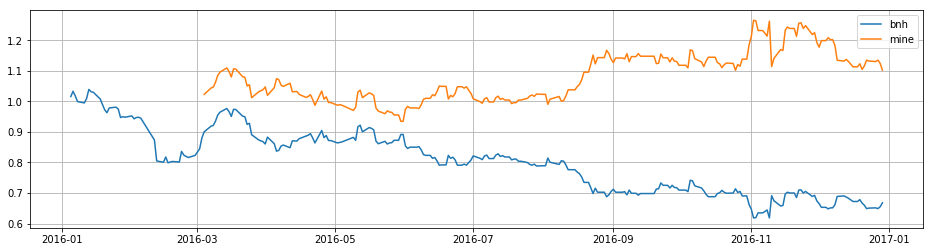

In [82]:
plt.plot(df['return'].cumprod(),label='bnh')
plt.plot(bt_df['bt_return'].cumprod(),label='mine')
plt.legend() ; plt.grid()